## Observations and Insights 

In [121]:
###IGIT###

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np


# Study data files . 
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)


# # Combine the data into a single dataset
# Display the data table for preview
# Here I udes df=pd.merg(...) to merge the mouse_metadata and the study_results onto "mouse_study_df" following the Mouse ID series.
mouse_study_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [122]:
# Check the number of mice.
# using dropna() to eliminate any null field
# mouse_study_df=mouse_study_df.dropna(how='all')
# mouse_study_df

# Employed --> namevar = (table name_df["series"]).count()
mice_num = (mouse_study_df["Mouse ID"]).count()
mice_num




1893

In [123]:
# Find any duplicate rows with the same Mouse ID's and Timepoint. 
# Reference used: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/

#In pandas we can easily get any duplicate on a series with in a dataframe using z=df[x.duplicate(['where'])]
duplicates_mousetime_output = mouse_study_df[mouse_study_df.duplicated( ['Mouse ID', 'Timepoint'] )]
duplicates_mousetime_output








,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [124]:
# Drop any duplicate rows
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

# From the previous table I want to take out all the duplicates shown for Mouse ID and Timepoint
# I use the new_df = merged_df.drop_duplicates([Series]),keep='last'
mouse_study_df=mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
mouse_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [125]:
# Recheck the number of mice
remice_num = (mouse_study_df["Mouse ID"]).count()
remice_num



1888

## Summary Statistics

In [126]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
# I used the following sintax for summary statistics mean=x_df.groupby('')[''].mean()
# Reference 1:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
# Reference 2: https://towardsdatascience.com/how-to-use-groupby-and-aggregate-functions-in-pandas-for-quick-data-analysis-c19e7ea76367

# groupby Drug Regimen to find mean
mean_groupbyDR = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# groupby Drug Regimen to find median
median_groupbyDR = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

# group by Drug Regimen to get standard deviation
stdv_groupbyDR = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

# groupby Drug Regimen to fing variance
variance_groupbyDR = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

# groupby Drug Regimen to find  SEM
sem_groupbyDR = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Create Summary dataframe for mean, median, variance, standard deviation and SEM.
Stat_sumry_df = pd.DataFrame({ "Mean": mean_groupbyDR, "Median": median_groupbyDR, "Var": variance_groupbyDR, "SEM": sem_groupbyDR, "Std Deviation": stdv_groupbyDR}) 
Stat_sumry_df


,Mean,Median,Var,SEM,Std Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.382993,50.783528,43.220205,0.526358,6.574208
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


In [127]:
# I did this to look at the dentency and compare
# Reference:https://numpy.org/doc/stable/reference/generated/numpy.mean.html

# I used np.mean to get the mean of the series
mean_numpy = np.mean(mouse_study_df ["Tumor Volume (mm3)"])
print(mean_numpy)

# I used np.media to get the mean of the series
median_numpy =np.median(mouse_study_df ["Tumor Volume (mm3)"])
print(median_numpy)

# I used np.var to the the variance of the series
var_numpy = np.var(np.mean(mouse_study_df ["Tumor Volume (mm3)"]),ddof = 0)
print(var_numpy)

# Iused np.std to get the standard deviation of the series
sd_numpy = np.std(np.mean(mouse_study_df ["Tumor Volume (mm3)"]),ddof = 0)
print(sd_numpy)

50.44841133656781
48.951421075
0.0
0.0


In [128]:
# Summary Statistics with using .describe
# I did this just to see the mean and std in comparison with previous method.

mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()



,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.382993,6.574208,45.000000,47.046068,50.783528,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

In [129]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
# Reference:https://www.kite.com/python/answers/how-to-reset-the-indexing-of-a-grouped-pandas-dataframe-in-python

#Part1
# regimen data was created to use the merged mouse_study_df  and  group/count/index for Drug Regimen
#regimen_data_df = pd.DataFrame( mouse_study_df.groupby (["Drug Regimen"]).count() )

# Set the index for Drug Regimen
#regimen_data_df = regimen_data_df.set_index("Drug Regimen")
#regimen_data_df

TypeError: 'str' object is not callable

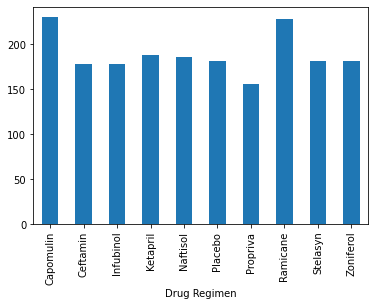

In [130]:
#Part2
# I use groupby on the Drug Regimen series for the Tummor Volume (mm3) and count
# This is require to create the panda bar chart for the drug regimen data
# Reference: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
Regimen_data_pandabr = mouse_study_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']

# create the plot bar df with the regiment data 
plot_bar = pd.DataFrame(Regimen_data_pandabr)
plot_bar

# set legent to False and rotatio to 90 degree for visibility
cut= plot_bar.plot.bar(legend=False,rot=90)
cut

# Create the title and designated the labes for the respective axis.
plt.title ("Drug Regimen Vs Data Point")
plt.ylabel ("DataPoints")
plt.xlabel ("Drug Regimen")






In [ ]:
# General identical bar plot using pyplot instead of pandas.
# Use DataFrame.plot() in order to create a bar chart of the data: selected bar and size.
# Reference: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

#Par1
# For this I need to list my values per axes
DrugRegimen=['Caponimulin ','Ceftamin ',' Infubinol',' Ketapril',' Naftisol',' Placebo','Propriva ','Ramican ','Stelasyn ','Zoniferol ']

# Datapoint was obtained from the group count on the previous chart
Datapoint=[230,188,186,182,181,156]

# I set up the x axis for the leng of Drug Regimen and search for the array shown below.
xpos= np.arange(len(DrugRegimen))
xpos




In [ ]:
# Generate identical bar plot using pyplot instead of pandas.
# Reference 1 for Xticks: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
# Reference 2 for ylim:https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.set_ylim.html

#Part2

# After identifying the values, I proceed to adjuticate the value to the respective axes
# The xpos contains the series for the DrugRegimen as unique and it was set at a 90 degrees rotation for better legibility
plt.xticks(xpos,DrugRegimen)
plt.xticks(rotation=90)
                  
# The axes contains the datapoints and it was lable "Datapoint" on this one we set the max as +50
plt.xlabel("Drug Regimen")
plt.ylabel("Datapoint")
plt.ylim(0, max(Datapoint)+50)

# The title of the table was set at top as "Drug Regimen vs. Data point" and plt.show() was applied 
plt.title("Drug Regimen Vs. Data Point")
plt.bar(x='Drug Regimen', y='Datapoint', label="Data Point")
plt.bar(DrugRegimen, Datapoint)
plt.show ()






In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Reference:https://datatofish.com/pie-chart-matplotlib/

#Part1
# I need to figure out how many are per sex using groupby
# Once I figure that I can then use the count to find the percentage per gender (male and female)
# the gender group was optaines using groupby on the Mouse IS and Sex series
gender_group = mouse_study_df.groupby ([ "Mouse ID","Sex" ])
gender_group


# finding the count for the sex group and store it under a total column
Mouse_Count_Gender = pd.DataFrame(mouse_study_df.groupby ([ "Sex" ]).count())
Mouse_Count_Gender 


# Using the count to get the Sex %
Mouse_Count_Gender_df = ((Mouse_Count_Gender  / Mouse_Count_Gender .sum())*100)


# gender_df
Mouse_Count_Gender_df

                                   
                           

In [ ]:
#Part2
# Once I get the data grouped by Sex I will be able to build the pie chart
# Reference:https://datatofish.com/pie-chart-matplotlib/

# Set cotent: Values and color criteria
labels = ['Female','Male']
colors = ['pink','blue']

# Create the pie chart using the Mouse_Count_Gender_df
plt.pie(Mouse_Count_Gender_df, labels=labels, colors=colors, autopct='%3.3f%%')
plt.title('Mouse Gender Percentage ')

# Create axid orientation as equal
plt.axis('equal')
plt.show()

In [ ]:
# Generate identical pie plot using pyplot
# Reference:https://datatofish.com/pie-chart-matplotlib/

#Using the information from the previous table the following was optained for the pie plot using puplot
# Set content: values and title
Sex= ["Male", "Female"]
Sexpercent = [50,49]
colors = ["blue","pink"]
plt.title = ("Mouse Gender Percentage")

# create the pie chart and its details for lable,color and partition
plt.pie(Sexpercent, labels=Sex, colors=colors,autopct="%3.3f%%", shadow=True, startangle=180)

# Create axis orientation as equal
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

###############################################################################################################################
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Reference: https://www.w3resource.com/pandas/dataframe/dataframe-loc.php
# Reference: https://www.w3resource.com/pandas/series/series-max.php

# loc to the Drug Regimen series contained in the mouse_study_df and named each regimen as dataframe
# Capomuling regimen df
Capomulin_df = mouse_study_df.loc[mouse_study_df ["Drug Regimen"]   ==  "Capomulin", :]

# Ceftamin regimen df
Ceftamin_df = mouse_study_df.loc[mouse_study_df  ["Drug Regimen"]   ==  "Ceftamin", :]

# Infubinol regimen df
Infubinol_df = mouse_study_df.loc[mouse_study_df ["Drug Regimen"]   ==  "Infubinol", :]

# Ramicane regien df
Ramicane_df = mouse_study_df.loc[mouse_study_df  ["Drug Regimen"]   ==  "Ramicane", :]

# Identify the regimen Capomulin highest value within the Timepoint with respect to the Mouse ID grouping
# DataFrame
Capomulinvaluelast = Capomulin_df.groupby ('Mouse ID') .max() ['Timepoint']
Capomulinvaluevol = pd.DataFrame (Capomulinvaluelast)

# Moving Mouse ID and Timepoint series and show 10 rows
Capomulinmerged = pd.merge(Capomulinvaluevol, mouse_study_df, on = ( "Mouse ID", "Timepoint" ), how = "left")


# Capomulin_vol = pd.DataFrame(Capomulin_last)
# Display closing arguments for each statement: df.head(),pd.dataframe, merged.head()
Capomulin_df.head()
Capomulinmerged.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [133]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
# Reference1:https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# Reference2:https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/

# From the Capomulinmerged = pd.merge I proceed to set up the quantiles
tumors_Capomulin = Capomulinmerged ["Tumor Volume (mm3)"]
quartiles = tumors_Capomulin.quantile ([ .25,.5,.75 ])

# designation of Lower and Upper quartiles
upperq = quartiles [ 0.75 ]
lowerq = quartiles [ 0.25 ]

# calculate IQR
# quartiles[.75] - quartiles[.25]
iqr = upperq-lowerq

# find limits
# lowerq-(1.5*xiqr)
# upperq+(1.5*xiqr)
lower_bound = lowerq - ( 1.5 * iqr )
upper_bound = upperq + ( 1.5 * iqr )

# printing possible outliers
print(f"Capomulin outliers: below {lower_bound} and above {upper_bound}  outliers.")

Capomulin outliers: below 20.70456164999999 and above 51.83201549  outliers.


In [134]:
# Identify the regimen Ramicane highest value within the Timepoint with respect to the Mouse ID grouping
# Getting regiment max for mouse id group/timepoint
Ramicanevaluelast = Ramicane_df.groupby('Mouse ID').max()['Timepoint']

# Moving Mouse ID and Timepoint series and show 10 rows
Ramicanevaluevol = pd.DataFrame(Ramicanevaluelast)
Ramicanemerged = pd.merge(Ramicanevaluevol, mouse_study_df, on = ("Mouse ID","Timepoint"), how = "left")

# pd.dataframe and .head printing 15 lines

Ramicanemerged.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [ ]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Reference1:https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# Reference2:https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/

# From the Ramicanemerged = pd.merge I proceed to set up the quantiles
tumors_Ramicane = Ramicanemerged ["Tumor Volume (mm3)"]
quartiles = tumors_Ramicane.quantile ([ .25,.5,.75 ])

# Lower and Upper quartiles
lowerq = quartiles [ 0.25 ]
upperq = quartiles [ 0.75 ]

# calculate IQR
# quartiles[.75] - quartiles[.25]
iqr = upperq-lowerq

# find limits
# lowerq-(1.5*xiqr)
# upperq+(1.5*xiqr)
lower_bound = lowerq - ( 1.5 * iqr )
upper_bound = upperq + ( 1.5 * iqr )

# Printing possible outliers
print(f"Ramicane possible outliers: below { lower_bound } and above { upper_bound } outliers.")

In [ ]:
# Getting regiment max for mouse id group/timepoint
Ceftaminvaluelast = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group for drug Ceftamin
Ceftaminvaluevol = pd.DataFrame(Ceftaminvaluelast)
Ceftaminmerged = pd.merge(Ceftaminvaluevol, mouse_study_df, on = ("Mouse ID","Timepoint"), how = "left")

# closing arguments for each statement: pd.dataframe, xmerged.head() with 7 rows.
Ceftaminmerged.head(10)


In [ ]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Reference1:https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# Reference2:https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/

# From the Ceftaminmerged = pd.merge I proceed to set up the quantiles
tumors_Ceftamin = Ceftaminmerged [ "Tumor Volume (mm3)" ]
quartiles = tumors_Ceftamin.quantile ([ .25,.5,.75 ])

# Lower and Upper quartiles
lowerq = quartiles [ 0.25 ]
upperq = quartiles [ 0.75 ]

# calculate IQR
# quartiles[.75] - quartiles[.25]
iqr = upperq-lowerq

# find limits
# lowerq-(1.5*xiqr)
# upperq+(1.5*xiqr)
lower_bound = lowerq - ( 1.5 * iqr )
upper_bound = upperq + ( 1.5 * iqr )

# printing possible outliers
print(f"Ceftamin outliers: below {lower_bound} and above {upper_bound}  outliers.")

In [ ]:
# Getting regiment max for mouse id group/timepoint
Infubinolvaluelast = Infubinol_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group for drug
Infubinolvaluevol = pd.DataFrame(Infubinolvaluelast)
Infubinolmerged = pd.merge(Infubinolvaluevol, mouse_study_df, on=("Mouse ID","Timepoint"),how="left")

# Display closing arguments for each statement: pd.dataframe, xmerged.head() with 5 rows.
Infubinolmerged.head(20)

In [ ]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Reference1:https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# Reference2:https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/

# proceed to set up the quantiles
tumors_Infubinol = Infubinolmerged["Tumor Volume (mm3)"]
quartiles = tumors_Infubinol.quantile ([ .25,.5,.75 ])

# find the quartiles
lowerq = quartiles [ 0.25 ]
upperq = quartiles [ 0.75 ]

# find the IQR
iqr = upperq-lowerq

# find the limit
lower_bound = lowerq - ( 1.5 * iqr )
upper_bound = upperq + ( 1.5 * iqr )

print(f"Infubinol outliers: below {lower_bound} and above {upper_bound}  outliers.")

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
# Reference1:https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.boxplot.html
# Reference2:https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/
# Reference2:https://blog.finxter.com/matplotlib-boxplot/

# There should be a single chart with four box plots inside it.
data_to_plot = [tumors_Capomulin, tumors_Ramicane, tumors_Infubinol, tumors_Ceftamin]

# designate axis, Y=Final Tumor Volume and x=Drugr Regimen
#flierprops = dict(color= 'red')

fig1, Axis = plt.subplots()
Axis.set_title('Tumors Volume Vs Regimen')
Axis.set_ylabel('Final Tumor Volume (mm3)')
Axis.set_xlabel('Drug Regimen')

#box plot for Drug Regimen
Axis.boxplot(data_to_plot,boxprops = dict(color= 'purple'),flierprops=dict(color='green'), labels=[ "Capomulin","Ramicane","Infubinol","Ceftamin" ])

plt.show()

## Line and Scatter Plots

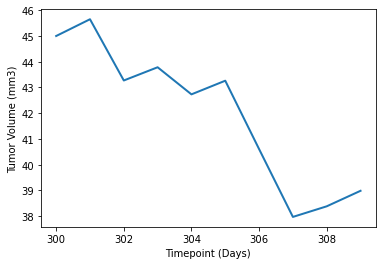

In [135]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

# finding mouse id for single id under Capomulin
mouse_study_df = Capomulin_df.loc[Capomulin_df[ "Mouse ID" ] == "b128",:]
Time = mouse_study_df [ 'Timepoint' ]
tumorVolumen = mouse_study_df[ "Tumor Volume (mm3)" ]

# designate axis labels and plot criteria
plt.plot(tumorVolumen,linewidth=2, markersize=30)
plt.ylabel( 'Tumor Volume (mm3)' )
plt.xlabel( 'Timepoint (Days)' )

plt.show()

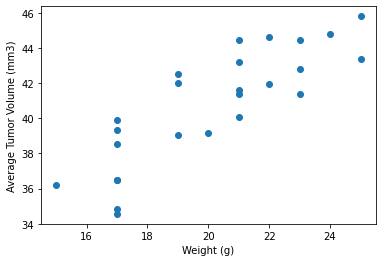

In [136]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
# Reference:https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

# Drug Capomulin groupby Mouse ID to calculate mean
Capomulinavg = Capomulin_df.groupby ([ 'Mouse ID']).mean()

# Setting scatter plot for Weigh vs Average Tumor Volume
plt.scatter(Capomulinavg [ 'Weight (g)' ],Capomulinavg[ 'Tumor Volume (mm3)' ])
plt.ylabel( 'Average Tumor Volume (mm3)' )
plt.xlabel( 'Weight (g)' )

plt.show()

## Correlation and Regression

In [137]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Reference1:https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html 
# Reference:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

#Part 1, Correlation Coefficient

# used correlation=x(sts.personr([])), to get the correlation coefficient
correlation = round(sts.pearsonr(Capomulinavg [ 'Weight (g)' ],Capomulinavg [ 'Tumor Volume (mm3)' ])[0],1)

# print frase with results
print(f"The correlation between weight and tumor volume is {correlation}")



The correlation between weight and tumor volume is 0.8


In [138]:
#Part2 , Lineal Regression

# Reference:https://lineal regression for Drug Regimen Capomulin to find mslop and intercept
# Reference:https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

# lineal regression for Drug Regimen Capomulin to find mslop and intercept
linealregression = sts.linregress(Capomulinavg ['Weight (g)'], Capomulinavg ['Tumor Volume (mm3)'])
linealregression

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

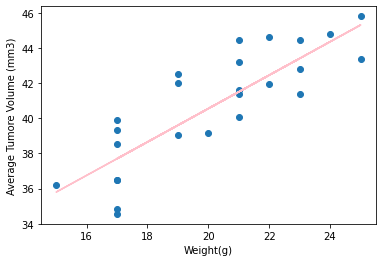

In [139]:
#Part3, Scatter Chart

# Reference:https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

# scatter chart series for Weight and Tommor Volume
plt.scatter (Capomulinavg ['Weight (g)'], Capomulinavg ['Tumor Volume (mm3)'])

# I used the slope and intercept values from the previouse step and created the plot.scatter chart
Slope     = 0.95
Intercept = 21.55

# Creat yaxis var to hold slope and line indercept for  Weight series
y_axd = Capomulinavg ['Weight (g)'] * Slope + Intercept

# lables for y and x axis
plt.ylabel ('Average Tumore Volume (mm3)')
plt.xlabel ('Weight(g)')

# plt.plot chart set up with color criteria for y_data
plt.plot(Capomulinavg['Weight (g)'],y_axd,color="pink")
plt.show()


# Observations and Insights

In [ ]:
#1-Capomulin has the lowes variance among the drugs followed by Ramicane
#2-Capomulin and Ramicane were the most used as regimen
#3-Capomulin treatment shows a decrease (4times) on the tumor volume for a regient cycle during a pedrion of 40. Intercalated resistance was observed but is noted as minimal below the stating volumne point.